## $$co_{2} emissions$$


In this report, a machine learning regression system is designed and implemented to compute the Co<sub>2</sub> emissions of vehicles.
The dataset that was used for this experiment can be downloaded from this site. [FuelConsumption](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

#### The independent variables are
- MODELYEAR
- MAKE 
- MODEL
- VEHICLE CLASS
- ENGINE SIZE
- CYLINDERS
- TRANSMISSION
- FUEL CONSUMPTION in CITY(L/100 km)
- FUEL CONSUMPTION in HWY (L/100 km)
- FUEL CONSUMPTION COMB (L/100 km)
- CO2 EMISSIONS (g/km)

#### The dependent variable is 
- CO2 EMISSIONS (g/km)
#### Tools
To implement the proposed system, four main libraries need to be downloaded. These libraries are listed below.
Libraries and frameworks

- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [scikit-learn](https://scikit-learn.org/stable/)

Import the main libraries and functions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

take a look at the dataset

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


Summarize the data


In [3]:
df.describe().mean()

MODELYEAR                   1643.875000
ENGINESIZE                   136.357774
CYLINDERS                    138.449025
FUELCONSUMPTION_CITY         144.699723
FUELCONSUMPTION_HWY          141.477389
FUELCONSUMPTION_COMB         143.227059
FUELCONSUMPTION_COMB_MPG     156.238766
CO2EMISSIONS                 341.825123
dtype: float64

Select some features

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

array([[<AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'ENGINESIZE'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>]],
      dtype=object)

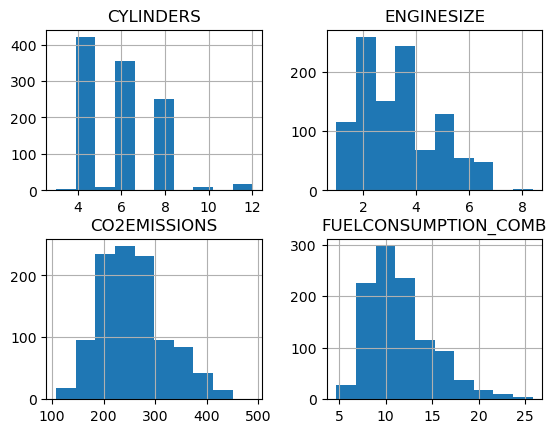

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()

Plot each of these features against the Emission, to see how linear their relationship

1- FUELCONSUMPTION_COMB with CO2EMISSIONS

Text(0, 0.5, 'Emission')

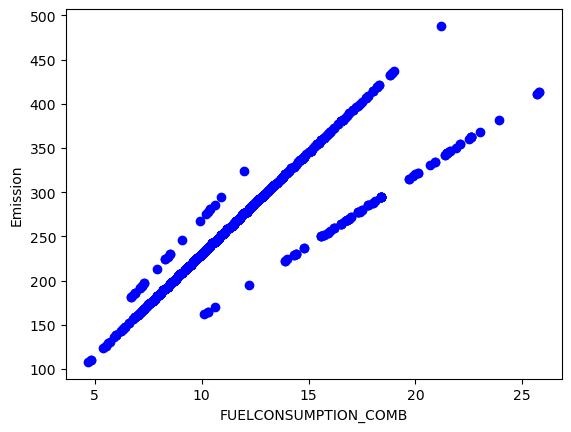

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")


2- CYLINDERS with CO2EMISSIONS

Text(0, 0.5, 'Emission')

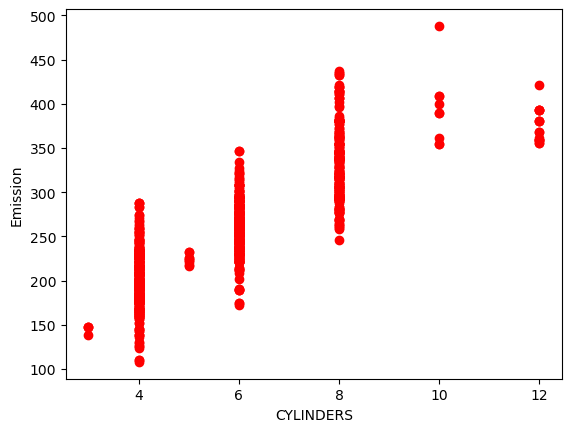

In [7]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")


3- ENGINESIZE with CO2EMISSIONS

Text(0, 0.5, 'Emission')

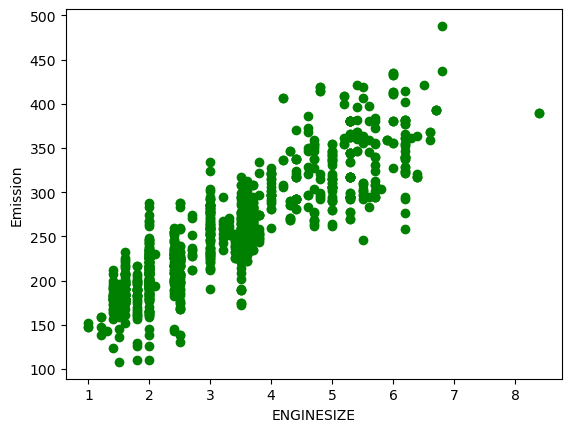

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")


Creating a train and test dataset by randomly selecting 80% of the data for training and 20% for testing. 

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[38.61324843]]
Intercept:  [126.86355405]


Evaluate the system 

In [11]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [12]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.30
Residual sum of squares (MSE): 1017.53
R2-score: 0.77


With the same process, they compute the results using FUELCONSUMPTION_COMB and CYLINDERS as independent variables. The figures below show the main difference.

![Figure_1](https://user-images.githubusercontent.com/30151596/201395789-814ce4f8-5e25-49f3-a993-5fcc24196c01.png)
![Figure_1](https://user-images.githubusercontent.com/30151596/201395913-be5df445-069d-408a-8ae0-f88633eea3bc.png)
![Figure_1](https://user-images.githubusercontent.com/30151596/201396001-2f63a8eb-030f-4f4f-9c86-4044c6391af7.png)

#### Conclusion

In the experiment, the CO2 emissions system is proposed based on the linear regression system. The proposed system is implemented and designed using the Python programming language. Three independent variables are used (engine size, number of cylinders, and fuel consumption). Three evaluation metrics are used to compute the results (MES, MAE, and R2_score). The findings show that using fuel consumption as an independent variable is more efficient than other ones since it achieves higher performance. The R2-score for the number of cylinders used was 69%, and the engine size was 76%, while the R2-score for fuel consumption was 77%. 